In [2]:
import sys
sys.path.insert(0, "/home/tumay/code/data-context-and-setup")

# Seaborn ile Doğrusal Regresyon

🚀 Seaborn kullanarak Doğrusal Regresyon analizine görsel olarak başlayalım!

Hedefimiz aşağıdakilerin ilk anlayışını elde etmektir:
- `orders` özelikleri ve
- onlarla ilişkili `review_scores`

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
# Import Modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

⚠️ Devam etmeden önce:
* 💾 Önceki ünitenin Orders challenge'ının çözümünü indirin
* 👥 `order_solution.py` dosyasının içeriğini `olist/order.py` dosyanıza kopyala-yapıştır yapın

⚠️ `olist` deponuzda `order.py` dosyasındaki kod değişikliklerini commit etmeyi unutmayın!

👇 Öncelikle `orders` veri setini içeri aktarın

In [4]:
# Import your orders training set
from olist.order import Order

orders = Order().get_training_data(with_distance_seller_customer=False)

## 1 - Özellik Korelasyonunu İnceleme

❓Özellikler arasındaki çeşitli korelasyonları inceleyin: hangi özellik `review_score` ile en çok korelasyonlu görünüyor?

<details>
    <summary>▸ İpucu</summary>

* `DataFrame.corr(numeric_only=True)` kullanın `sns.heatmap()` ve `cmap='coolwarm'` ile kombinasyon yaparak
* `review_score` ile her bir özellik arasındaki korelasyon katsayılarının mutlak değerlerine bakın,
    * katsayı ne kadar yüksekse, verilen özellik `review_score` ile o kadar çok korelasyonludur (pozitif veya negatif)

</details>

In [9]:
type(orders), orders.shape


(pandas.core.frame.DataFrame, (96353, 12))

In [10]:
num = orders.select_dtypes(include="number")
num.columns


Index(['wait_time', 'expected_wait_time', 'delay_vs_expected',
       'dim_is_five_star', 'dim_is_one_star', 'review_score',
       'number_of_items', 'number_of_sellers', 'price', 'freight_value'],
      dtype='object')

In [11]:
corr = num.corr(numeric_only=True)
corr.shape


(10, 10)

In [12]:
review_corr = corr["review_score"]
review_corr


wait_time            -0.333758
expected_wait_time   -0.052410
delay_vs_expected    -0.272281
dim_is_five_star      0.791787
dim_is_one_star      -0.807700
review_score          1.000000
number_of_items      -0.123492
number_of_sellers    -0.116942
price                -0.034742
freight_value        -0.090013
Name: review_score, dtype: float64

In [13]:
review_corr = review_corr.drop("review_score")


In [14]:
review_corr_abs_sorted = review_corr.abs().sort_values(ascending=False)
review_corr_abs_sorted


dim_is_one_star       0.807700
dim_is_five_star      0.791787
wait_time             0.333758
delay_vs_expected     0.272281
number_of_items       0.123492
number_of_sellers     0.116942
freight_value         0.090013
expected_wait_time    0.052410
price                 0.034742
Name: review_score, dtype: float64

In [15]:
num_df = orders.select_dtypes(include="number")
corr = num_df.corr(numeric_only=True)

corr["review_score"].sort_values(ascending=False)



review_score          1.000000
dim_is_five_star      0.791787
price                -0.034742
expected_wait_time   -0.052410
freight_value        -0.090013
number_of_sellers    -0.116942
number_of_items      -0.123492
delay_vs_expected    -0.272281
wait_time            -0.333758
dim_is_one_star      -0.807700
Name: review_score, dtype: float64

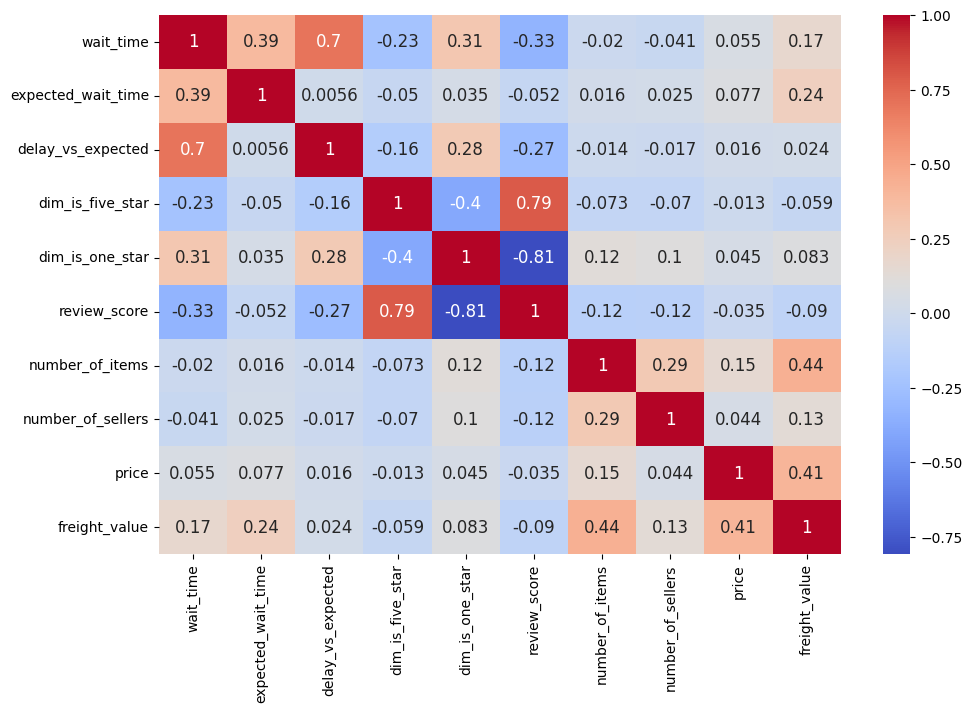

In [6]:
# Correlation plot
plt.figure(figsize=(11,7))
sns.heatmap(
    data=orders.corr(numeric_only=True),
    cmap='coolwarm',
    annot=True,
    annot_kws={"size": 12}
);



* 😏 _Kaptan Açık :_
    * `review_score` kendisiyle %100 korelasyonludur
    * ve `dim_is_one_star` ve `dim_is_five_star` ile güçlü korelasyonludur...
* ⚠️ `review_score` ile ilgili sonraki iki en yüksek korelasyon katsayısı :
    * `wait_time` : - %34
    * `delay_vs_expected` : - %27

## 2. `review_score` ile teslimat süresi arasında Doğrusal Regresyon

👉 Görünüşe göre `review_score` çoğunlukla `wait_time` (= - %34) ve `delay_vs_expected` (- %27) ile korelasyonludur.

🎨 Bu korelasyonları `seaborn` ile araştıralım

### 2.1 Grafikler
❓ Sırasıyla `review_score` ile `wait_time` ve `delay_vs_expected` arasında regresyon yapan 2 grafik oluşturun.

<u>İpuçları</u>:

- Hız açısından veri çerçevesini rastgele bir `10.000 satırlık örneğe` indirin (veri keşiflemede iyi bir uygulama)
- Gerekirse her yürütmede örneği değiştirilmekten kaçınmak için `DataFrame.sample()` sabit bir `random_state` ile kullanın
- Regresyon `lines` çizmek için `sns.regplot()` kullanın
- Saçılım grafiğinin yoğunluğunu daha iyi görselleştirmek için bazı `y_jitter` parametreleri ekleyin
- `sns.regplot()` hemen sonrasına bunu ekleyerek `xlim` ve `ylim` sınırlayın (aynı hücrede):
  ```python
  plt.xlim(right=70)
  plt.ylim(bottom=0)
  ```

In [16]:
sample = orders.sample(10000, random_state=42)

In [18]:
sample.shape

(10000, 12)

(0.0, 5.960086082565532)

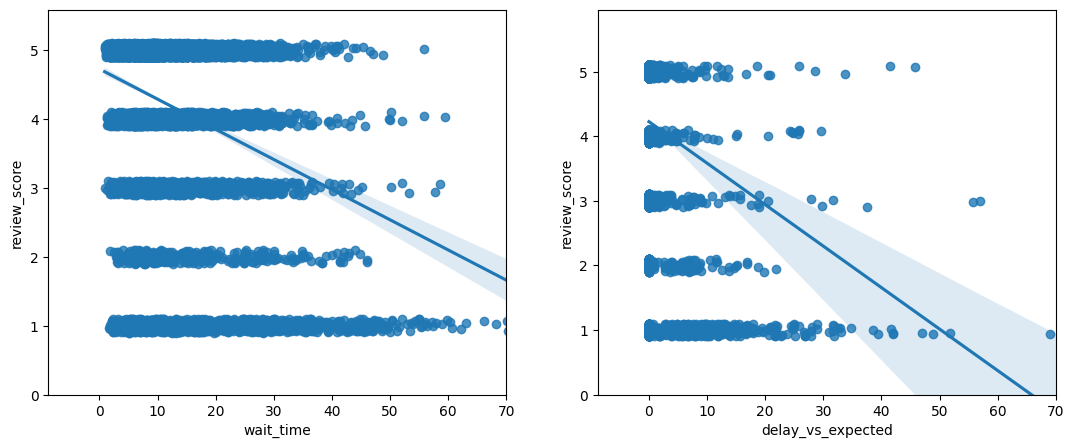

In [17]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.regplot(x=sample.wait_time, y=sample.review_score, y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1,2,2)
sns.regplot(x=sample.delay_vs_expected, y=sample.review_score, y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

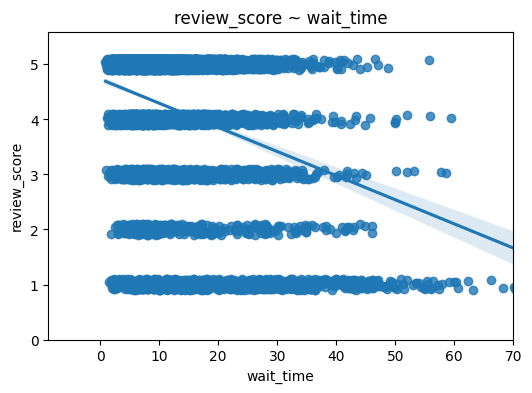

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.regplot(x=sample["wait_time"], y=sample["review_score"], y_jitter=0.1)
plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("review_score ~ wait_time")
plt.show()


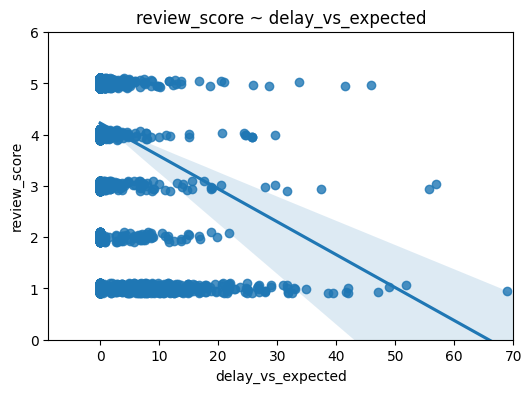

In [20]:
plt.figure(figsize=(6,4))
sns.regplot(x=sample["delay_vs_expected"], y=sample["review_score"], y_jitter=0.1)
plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("review_score ~ delay_vs_expected")
plt.show()


In [21]:
import numpy as np

# 1) wait_time eğimi
x1 = sample["wait_time"]
y  = sample["review_score"]
slope_wait, intercept_wait = np.polyfit(x1, y, 1)

# 2) delay_vs_expected eğimi
x2 = sample["delay_vs_expected"]
slope_delay, intercept_delay = np.polyfit(x2, y, 1)

slope_wait, slope_delay


(-0.04380266996695329, -0.06420665418084122)

ℹ️ `regplot` ne yaptı ? 

👉 `review_score` ile `wait_time` ve `delay_vs_exp` arasında `Doğrusal Regresyon` yapmaya çalıştı

🧐 Pek yorumlanabilir görünmüyor, değil mi ?

👉 Haklısınız: sadece 5 farklı review skoru vardır ve bunlar beş farklı olası değeri olan kategorisel bir değişken olarak yorumlanabilir (örneğin: "çok kötü", "kötü", "orta", "iyi" ve "çok iyi") ve `wait_time` ve `delay_vs_exp` olan iki sürekli değere karşı regresyon yapmaya çalışıyoruz.

👀 Ancak regresyon çizgilerine göre çok sezgisel bir desen görebiliriz: bekleme süresi ve/veya gecikme ne kadar uzunsa, review skoru o kadar düşüktür - şaşırtıcı değil. Ama review skoru ne kadar hızlı düşüyor ?

### 2.2 Yorumlama

❓Her eğrinin `eğimini` görsel olarak "hesaplamaya" çalışın. 

✍️ Bu katsayıları veri eğitimi almamış bir kitleye açıklamış olsaydınız, bunları nasıl yorumlayacağınızı yazın.

wait_time eğimi ~ -0.05 ise:

“Teslimat süresi 1 gün uzadığında, ortalama review_score yaklaşık 0.05 düşüyor.”

delay_vs_expected eğimi ~ -0.10 ise:

“Beklenen tarihten 1 gün daha geç teslim edildiğinde, ortalama review_score yaklaşık 0.10 düşüyor.”

Neden delay daha etkili görünüyor?
Çünkü insanlar “uzun beklemeye” bazen razı olur ama “söz verilen tarihin kaçması” güven kırar.

<details>
    <summary>Cevap</summary>

- `Slope wait_time ≈ -0.05` : "Bir sipariş teslim edilmesi için beklenen her ek gün için, review skoru ortalama olarak 0.05 azalır"
- `Slope delay ≈ -0.1` : "Bir sipariş _beklenen teslimat tarihinden sonra_ teslim edilmesi için her ek gün, review skoru ortalama olarak 0.1 azalır"

❓ Gecikmenin bekleme süresinden daha etkileyici görünmesine şaşırdınız mı? 

👉 Siparişinizi almak için sabırsız olabilirsiniz ve kısa bir bekleme süresi istersiniz, ancak paketinizi beklenen teslimat tarihinden sonra almaktan daha da hayal kırıklığına uğrarsınız!

</details>

### 2.3 Çıkarımsal Analiz

Bu regplotlar için 100.000 siparişin tamamını kullansak bile, bu siparişler sonuçta sadece 16 ayın verilerini temsil eder...

⚠️⚠️⚠️ Bu katsayıların **istatistiksel olarak anlamlı** olduğundan **ne kadar emin** olduğumuz? ⚠️⚠️⚠️

⚡️ Bu katsayıların istatistiksel anlamlılığı hakkında sorular:

* Bu katsayılar gelecekteki siparişlere iyi bir şekilde genelleştirilebilir mi (diğer her şey eşit olarak) ? (*İdeal cevap: Evet*) 
* Bu katsayıların sınırlı gözlem döneminden kaynaklanan rastgele dalgalanmalar yakalamadığından emin miyiz ? (*İdeal cevap: Hayır*) 

🧐 Bu iki eğim için ortalama değer etrafında **`güven aralığını`** tahmin etmemiz gerekir  :
$$slope_{wait} = -0.05 ± \ ?? \ \text{[%95 aralık]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[%95 aralık]} $$

⭐️ Neyse ki, `Seaborn` bu %95 güven aralığını regresyon çizgisinin etrafında gölgeli bir mavi koni ile zaten hesaplamıştır!

❓`Seaborn` `regplot` yeniden kullanarak iki güven aralığını görselleştirin:
- Örnek veri setinizin `boyutunu değiştirin`: 
    - Örnek boyutu küçüldükçe eğimin nasıl değiştiğine dikkat edin. 
    - Güven aralığı hakkında ne dersiniz?
- `ci` adlı regplot parametresi ile oynayarak `güven aralığının boyutunu` değiştirin (%95 varsayılan)

In [ ]:
# YOUR CODE HERE

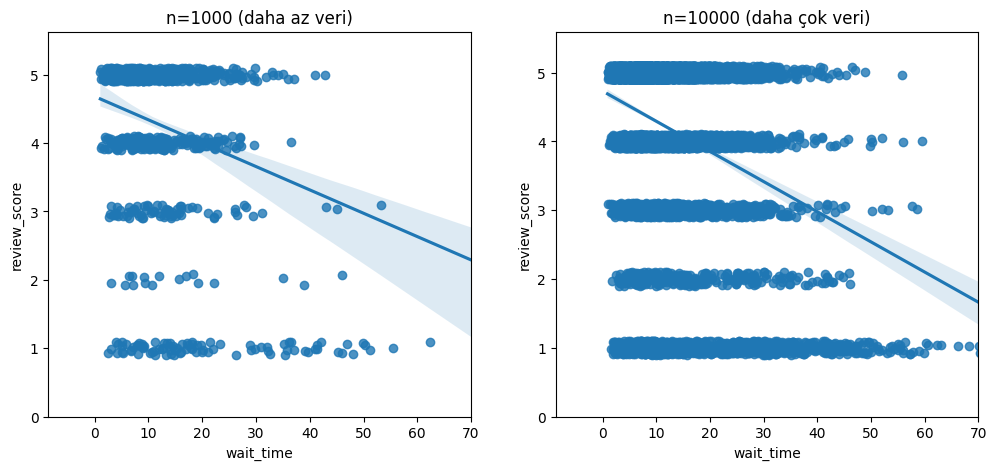

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1) küçük örneklem
sample_1k = orders.sample(1000, random_state=42)

# 2) büyük örneklem
sample_10k = orders.sample(10000, random_state=42)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(data=sample_1k, x="wait_time", y="review_score", y_jitter=0.1)
plt.xlim(right=70); plt.ylim(bottom=0)
plt.title("n=1000 (daha az veri)")

plt.subplot(1,2,2)
sns.regplot(data=sample_10k, x="wait_time", y="review_score", y_jitter=0.1)
plt.xlim(right=70); plt.ylim(bottom=0)
plt.title("n=10000 (daha çok veri)")

plt.show()


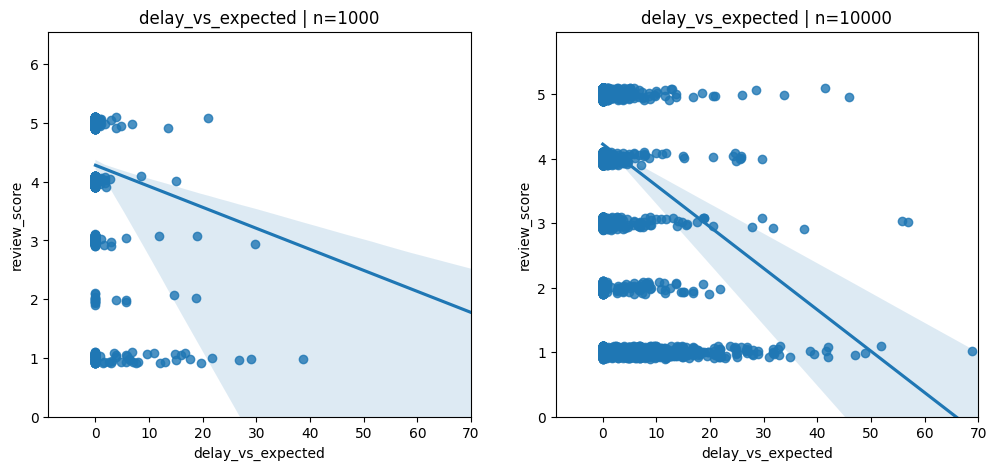

In [23]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(data=sample_1k, x="delay_vs_expected", y="review_score", y_jitter=0.1)
plt.xlim(right=70); plt.ylim(bottom=0)
plt.title("delay_vs_expected | n=1000")

plt.subplot(1,2,2)
sns.regplot(data=sample_10k, x="delay_vs_expected", y="review_score", y_jitter=0.1)
plt.xlim(right=70); plt.ylim(bottom=0)
plt.title("delay_vs_expected | n=10000")

plt.show()


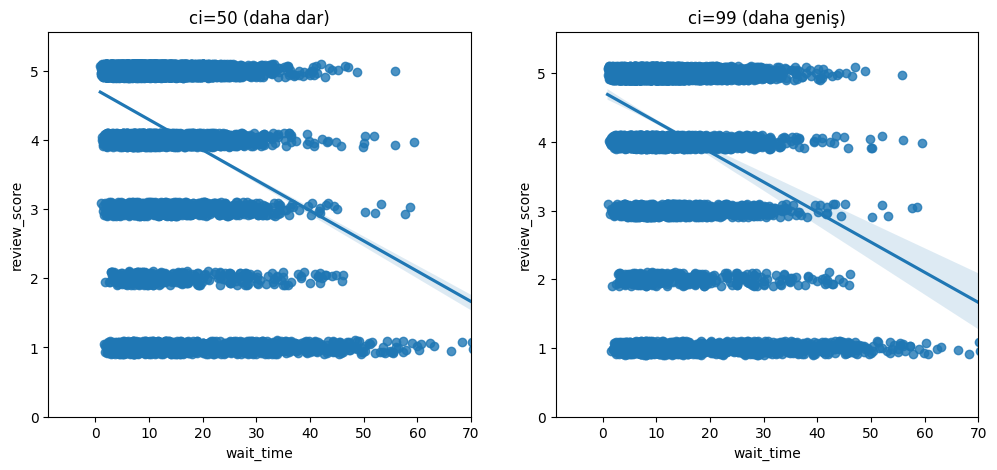

In [24]:
sample = orders.sample(10000, random_state=42)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.regplot(data=sample, x="wait_time", y="review_score", y_jitter=0.1, ci=50)
plt.xlim(right=70); plt.ylim(bottom=0)
plt.title("ci=50 (daha dar)")

plt.subplot(1,2,2)
sns.regplot(data=sample, x="wait_time", y="review_score", y_jitter=0.1, ci=99)
plt.xlim(right=70); plt.ylim(bottom=0)
plt.title("ci=99 (daha geniş)")

plt.show()


🔎 Yorumlama:

* **Boş Hipotez** $H_0$ : "bu değişken review skoru etkilemez", yani katsayısı sıfıra eşittir

Tüm veri noktalarımızı çizdiğimizde:
- Eğim için %95 güven aralığı 0 değerini içermez.
    - 👉 `Daha yavaş teslimatların daha zayıf yorumlarla ilişkili olduğundan %95 emin`.
- "Teslimat süresinin review skorları üzerindeki etkisi hemen hemen sıfırdır" boş hipotezi ile ilişkili **`p-değeri`** %5'ten düşüktür
    - 👉 Bu boş hipotezi güvenle reddedebilir ve **`alternatif hipotez`** = `"teslimat süresi review skoru üzerinde etkiye sahiptir"` düşünebiliriz

🔥 Bulguşlarımızın **istatistiksel olarak anlamlı** olduğu söylenir. 

⚠️ Ancak, **korelasyon nedensellik anlamına gelmez**. 

- Belirli ürünlerin teslimatı doğal olarak daha yavaş olabilir (örn. ağır ürünler)
    - Bu ürün kategorileri, teslimat sürelerinin ne kadar uzun olursa olsun, genellikle düşük review_score'a sahip olacaktır. 

👉 **Karıştırıcı faktörleri** tanımlamak çok önemlidir ve basit bir tek değişkenli regresyon ile yapılamaz. 

</details>

---
🏁 Tebrikler! 

🙏 Notebook'unuzu `commit` ve `push` etmeyi unutmayın